In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec

In [2]:
from yt.units import *

# 三维中的 HAT-P-7

规定视线方向为 $Z$ 轴方向，选取 $X,Y$ 轴形成右手系，则对其中任意一个单位向量 $(x,y,z)$ 可进行如下重参数化

$$
x=\sin i\cos\phi
$$
$$
y=\sin i\sin\phi
$$
$$
z=\cos i
$$

这里的 $i$ 即为所谓的轨道倾角，$\phi$ 是向量在 $XOY$ 平面上的投影与 $X$ 轴的夹角

In [3]:
def vector(i, phi):
    x = np.sin(i) * np.cos(phi)
    y = np.sin(i) * np.sin(phi)
    z = np.cos(i)
    return (np.array([x, y, z]))


def dtheta(vec1, vec2):
    cos = (vec1 @ vec2) / np.sqrt(vec1 @ vec1) / np.sqrt(vec2 @ vec2)
    return (np.arccos(cos))


def rot(vec):
    i = np.arccos(vec[2])
    phi = np.arctan2(vec[1], vec[0])
    phi_p = np.linspace(0, 2 * np.pi, 1000)
    A = np.sin(i) * np.cos(phi - phi_p)
    B = np.cos(i)
    i_p = -np.arctan2(B, A)
    return (i_p, phi_p)


def proj_traj(vec):
    i, phi = rot(vec)
    x = np.sin(i) * np.cos(phi)
    y = np.sin(i) * np.sin(phi)
    z = np.cos(i)
    return (x, y, z)

In [4]:
def plot_3d(vec1, vec2):
    theta = dtheta(vec1, vec2) * 180 / np.pi
    sky_proj = np.array([1, 1, 0])
    theta_proj = dtheta(vec1 * sky_proj, vec2 * sky_proj) * 180 / np.pi

    f, ax = plt.subplots(figsize=(10, 10))
    ax = Axes3D(f)

    ax.text(vec1[0],
            vec1[1],
            vec1[2],
            '$i=${:.1f}'.format(np.arccos(vec1[2]) * 180 / np.pi),
            size=18)
    ax.text(vec2[0],
            vec2[1],
            vec2[2],
            '$i_*=${:.1f}'.format(np.arccos(vec2[2]) * 180 / np.pi),
            size=18)
    ax.text(0, 0, 0, '{:.1f}'.format(theta), size=18)
    ax.text(0, 0, -1, '{:.1f}'.format(theta_proj), size=18)

    ax.quiver(0,
              0,
              0,
              vec1[0],
              vec1[1],
              vec1[2],
              color='#7fc97f',
              label='orbital',
              linewidth=2)
    x_p, y_p, z_p = proj_traj(vec1)

    ax.plot3D(x_p, y_p, z_p, color='#7fc97f')
    ax.quiver(0,
              0,
              0,
              vec2[0],
              vec2[1],
              vec2[2],
              color='#fdc086',
              label='stellar',
              linewidth=2)
    x_s, y_s, z_s = proj_traj(vec2)
    ax.plot3D(0.2 * x_s, 0.2 * y_s, 0.2 * z_s, color='#fdc086')

    ax.plot3D([0, 0], [0, 0], [1.5, -1], color='k', linestyle='--')
    ax.plot3D([vec1[0], vec1[0]], [vec1[1], vec1[1]], [vec1[2], -1],
              color='k',
              linestyle=':')
    ax.plot3D([vec2[0], vec2[0]], [vec2[1], vec2[1]], [vec2[2], -1],
              color='k',
              linestyle=':')

    ax.quiver(0,
              0,
              -1,
              vec1[0],
              vec1[1],
              0,
              color='#7fc97f',
              linestyle='--',
              label='orbital (proj)',
              linewidth=2)
    ax.quiver(0,
              0,
              -1,
              vec2[0],
              vec2[1],
              0,
              color='#fdc086',
              linestyle='--',
              label='stellar (proj)',
              linewidth=2)

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('Z', fontsize=20)

    ax.tick_params(labelsize=12)
    ax.legend(fontsize=15)

    return (theta, theta_proj)

In [5]:
#Vector 1
i_p = 80.8 * deg  #from the paper
phi_p = 0 * deg

#Vector 2
i_s = 40 * deg
phi_s = 182.5 * deg  #from the paper

vec_P = vector(i_p, phi_p)
vec_S = vector(i_s, phi_s)

(120.75972465639894, 177.50000000000006)

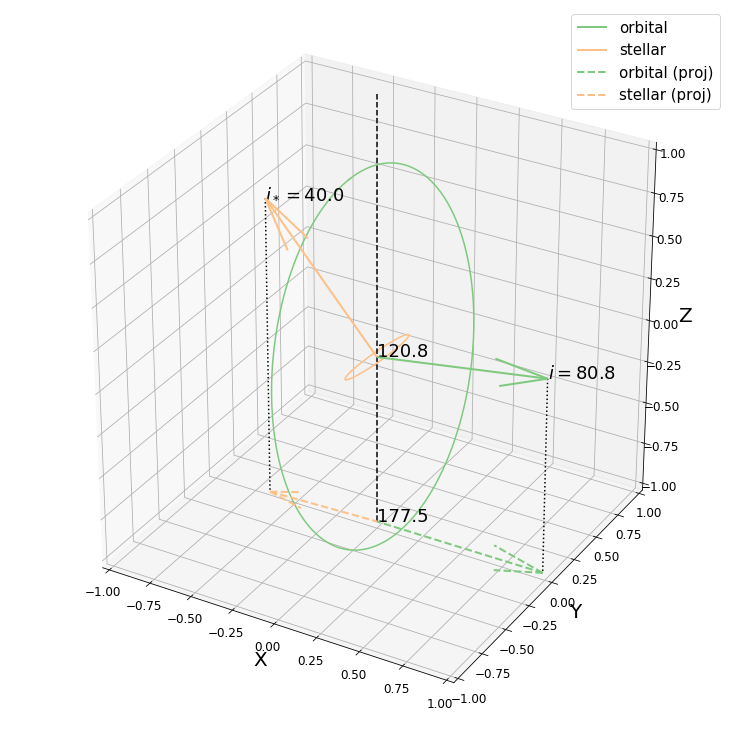

In [6]:
plot_3d(vec_P, vec_S)

# 天平面上的投影

In [7]:
def circle(r, ax, color='#fdc086'):
    theta = np.linspace(0, np.pi * 2, 1000)
    x = np.cos(theta) * r
    y = np.sin(theta) * r
    ax.plot(x, y, color=color)

In [8]:
def plot_proj(vec_P, vec_S, ax=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(10, 10))

    ax.plot(ytr, xtr, color='#7fc97f')
    ax.plot(ytr, -xtr, color='#7fc97f', linestyle=':')

    ax.quiver(0,
              0,
              vec_P[1],
              vec_P[0],
              color='#7fc97f',
              linestyle='--',
              label='orbital (proj)',
              linewidth=2)
    ax.quiver(0,
              0,
              vec_S[1],
              vec_S[0],
              color='#fdc086',
              linestyle='--',
              label='stellar (proj)',
              linewidth=2)

    circle(r=1, ax=ax)

    ax.set_xlim(-a, a)
    ax.set_ylim(-a, a)
    ax.set_xlabel('Y ($R_*$)', fontsize=20)
    ax.set_ylabel('X ($R_*$)', fontsize=20)
    ax.tick_params(labelsize=12)
    ax.grid()
    ax.legend(fontsize=18)

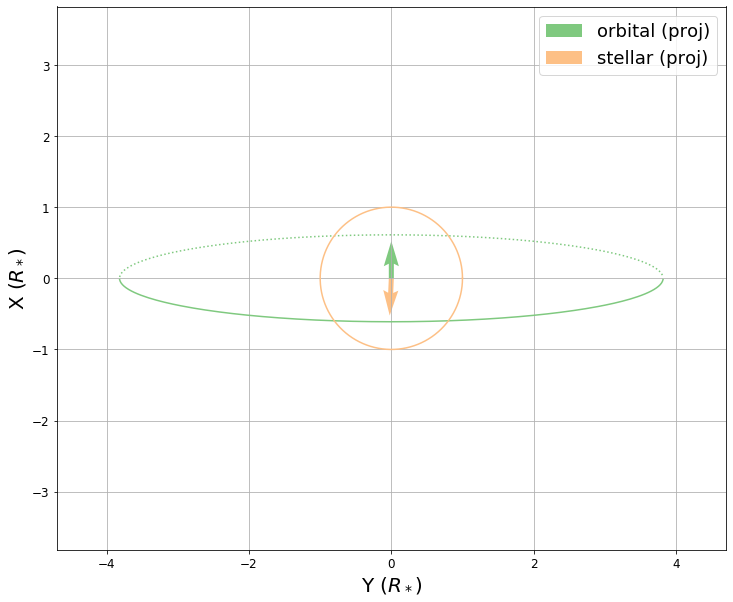

In [9]:
f, ax_proj = plt.subplots(figsize=(12, 10))
ax_proj.axis('equal')
a = 3.82  #from the paper

x_p, y_p, z_p = proj_traj(vec_P)
x_p *= a
y_p *= a
z_p *= a
x_s, y_s, z_s = proj_traj(vec_S)

arg1 = np.argwhere(z_p > 0).flatten()
xtr, ytr = x_p[arg1], y_p[arg1]
arg2 = ytr.argsort()
xtr, ytr = xtr[arg2], ytr[arg2]

plot_proj(vec_P, vec_S, ax_proj)

# 视向速度

## 质心视向速度

$$
RV_{CoM}=\dot\gamma t
$$

In [10]:
acc = 21.5 * meter / second / year
(acc * 100 * day).in_units('m/s') #dv in 100 days

5.886379192334018 m/s

$$\frac{M_{c} \sin i_{c}}{a_{c}^{2}} \sim \frac{\dot{\gamma}}{G}=(0.121 \pm 0.014) M_{\mathrm{Jup}} \mathrm{AU}^{-2}$$

## 行星扰动带来的视向速度

$$RV_P(t) = v\sin\left(\frac{2\pi t}{P}+\phi\right)$$

其中与该系统的物理参数相关的量只有 $v$ 和 $P$

$$
vP^{1/3}=\left[\frac{2\pi G}{(M_P+M_S)^2}\right]^{1/3}M_P\sin i
$$

$$
\left[\frac{G(M_S+M_P)}{(2\pi/P)^2}\right]^{1/3}=a
$$

从而在已知 $v$ 和 $P$ 时可以利用恒星的质量 $M_S$ 计算 $M_P\sin i$

In [11]:
v = 210 * meter / s
P = 2.2 * day
Ms = 1.5 * Msun
Mpsini = v * P**(1 / 3) / (2 * np.pi * gravitational_constant / Ms**2)**(1 / 3)
a = (gravitational_constant*Ms/(2*np.pi/P)**2)**(1/3)
Mpsini / jupiter_mas, a.in_units('AU')

(1.7606076013746863 dimensionless, 0.03789399386595383 AU)

In [12]:
P = 2.2047304 * day
Mp = 1.8 * jupiter_mas
G = gravitational_constant
Ms = 1.5 * Msun
v = ((2 * np.pi * gravitational_constant * Mp**3 / (Mp + Ms)**2)**(1 / 3) *
     np.sin(i_p) / P**(1 / 3)).in_units('m/s')
v

211.62348356014772 m/s

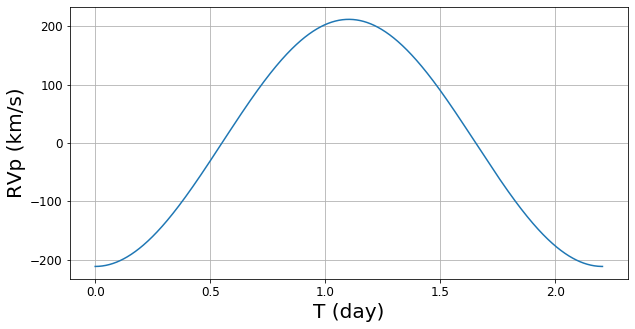

In [13]:
tp = np.linspace(0, P, 1000)
RVp = -v * np.cos(2 * np.pi / P * tp)
f, ax = plt.subplots(figsize=(10, 5))
ax.plot(tp, RVp)
ax.set_xlabel('T (day)', fontsize=20)
ax.set_ylabel('RVp (km/s)', fontsize=20)
ax.tick_params(labelsize=12)
ax.grid()

## Rossiter–McLaughlin (RM) effect

In [14]:
gamma = 0.0834  #from the paper
spin = 4900 * m / s / np.sin(i_s)  #from the paper

### 绘制恒星表面的视向速度

In [15]:
def stellar_rv(spin, ax, n_theta=401, n_r=101):
    x_circ, y_circ = np.array([]), np.array([])
    for theta in np.linspace(-np.pi / 2, np.pi * 3 / 2, n_theta):
        for r2 in np.linspace(0, 1, n_r):
            x_circ = np.append(x_circ, np.sqrt(r2) * np.cos(theta))
            y_circ = np.append(y_circ, np.sqrt(r2) * np.sin(theta))

    vrot = -spin * (vec_S[1] * x_circ - vec_S[0] * y_circ)  #cross product

    im = ax_proj.scatter(x=y_circ,
                         y=x_circ,
                         c=np.array(vrot),
                         cmap='RdBu_r',
                         s=1.3)
    #cbar = f.colorbar(im)
    #cbar.set_label('Radial Velocity (m/s)', fontsize=20)
    return (x_circ, y_circ, vrot)

### 数值计算 RM 效应

分别计算均匀发光的圆盘和有临边昏暗的圆盘的 RM 效应，其中对临边昏暗我们使用简单的近似

$$
I(r)=I_0(r)\left[1-\epsilon(1-\sqrt{1-r^2})\right]
$$

In [16]:
def rm_rv(x_circ, y_circ, vr, x=None, y=None, r=None, epsilon=0):
    v = vr * (1 - epsilon * (1 - (np.heaviside(1 - x_circ**2 - y_circ**2, 0) *
                                  (1 - x_circ**2 - y_circ**2))**(1 / 2)))
    if x == None or y == None or r == None:
        return (v.mean())
    arg = np.argwhere(((x_circ - x)**2 + (y_circ - y)**2) >= r**2).flatten()
    v = v[arg]
    return (v.mean())


def plot_RM_rv(x_circ, y_circ, v, ax, ld=True):

    #No limb darkening
    RM_rv = np.array([])

    for i in range(len(xtr)):
        RM_rv = np.append(
            RM_rv, rm_rv(x_circ, y_circ, v, x=xtr[i], y=ytr[i], r=gamma))

    RM_res = rm_rv(x_circ, y_circ, v)  #numerical
    RM_rv -= float(RM_res)
    ax.plot(ytr, RM_rv)

    if ld:
        #With Limb darkening
        RM_rv_ld = np.array([])
        for i in range(len(xtr)):
            RM_rv_ld = np.append(
                RM_rv_ld,
                rm_rv(x_circ, y_circ, v, x=xtr[i], y=ytr[i], r=gamma, epsilon=0.6))

        RM_res_ld = rm_rv(x_circ, y_circ, v, epsilon=0.6)  #numerical
        RM_rv_ld -= float(RM_res_ld)
        ax.plot(ytr, RM_rv_ld, linestyle='--')
    
    arg_transit = np.argwhere((xtr**2 + ytr**2) <= 1)
    xin, xout = xtr[arg_transit[0]], xtr[arg_transit[-1]]

    ax.vlines(-np.sqrt((1 + gamma)**2 - xin**2),
              RM_rv.min(),
              RM_rv.max(),
              linestyle=':')
    ax.vlines(-np.sqrt((1 - gamma)**2 - xin**2),
              RM_rv.min(),
              RM_rv.max(),
              linestyle=':')
    ax.vlines(np.sqrt((1 + gamma)**2 - xout**2),
              RM_rv.min(),
              RM_rv.max(),
              linestyle=':')
    ax.vlines(np.sqrt((1 - gamma)**2 - xout**2),
              RM_rv.min(),
              RM_rv.max(),
              linestyle=':')
    ax.grid()
    ax.set_ylabel('RV (m/s)', fontsize=20)
    ax.tick_params(labelsize=12)
    ax_proj.set_xlabel(xlabel=None)

## 掩星时的光变曲线

In [17]:
def transit(x_circ, y_circ, x=None, y=None, r=None, epsilon=0):
    if x == None or y == None or r == None:
        return 1
    I = np.ones(len(x_circ))
    I *= (1 - epsilon * (1 - (np.heaviside(1 - x_circ**2 - y_circ**2, 0) *
                              (1 - x_circ**2 - y_circ**2))**(1 / 2)))
    Imean = I.mean()
    arg = np.argwhere(((x_circ - x)**2 + (y_circ - y)**2) <= r**2).flatten()
    I[arg] = 0
    return (I.mean() / Imean)


def plot_transit(x_circ, y_circ, ax):
    #No limb darkening
    lc = np.array([])
    for i in range(len(xtr)):
        lc = np.append(lc, transit(x_circ, y_circ, x=xtr[i], y=ytr[i],
                                   r=gamma))
    ax.plot(ytr, lc)

    #With Limb darkening
    lc_ld = np.array([])
    for i in range(len(xtr)):
        lc_ld = np.append(
            lc_ld,
            transit(x_circ, y_circ, x=xtr[i], y=ytr[i], r=gamma, epsilon=0.6))
    ax.plot(ytr, lc_ld, linestyle='--')

    arg_transit = np.argwhere((xtr**2 + ytr**2) <= 1)
    xin, xout = xtr[arg_transit[0]], xtr[arg_transit[-1]]

    ax.vlines(-np.sqrt((1 + gamma)**2 - xin**2), 0, 1, linestyle=':')
    ax.vlines(-np.sqrt((1 - gamma)**2 - xin**2), 0, 1, linestyle=':')
    ax.vlines(np.sqrt((1 + gamma)**2 - xout**2), 0, 1, linestyle=':')
    ax.vlines(np.sqrt((1 - gamma)**2 - xout**2), 0, 1, linestyle=':')
    ax.grid()
    ax.set_ylabel('I res', fontsize=20)
    ax.tick_params(labelsize=12)
    ax.set_ylim(lc_ld.min() * 0.995, 1 + lc_ld.min() * 0.005)

## 联合分析

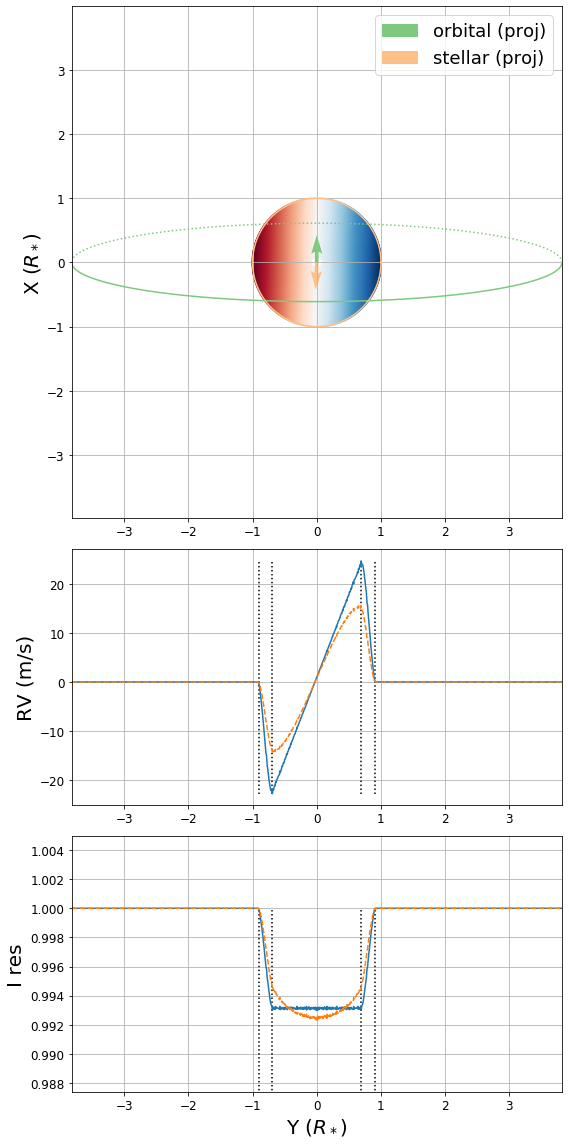

In [18]:
a = 3.82  #from the paper
spin = 4900 * m / s / np.sin(i_s)  #from the paper

x_p, y_p, z_p = proj_traj(vec_P)
x_p *= a
y_p *= a
z_p *= a

f = plt.figure(figsize=(8, 16))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])
ax_proj = plt.subplot(gs[0])
ax_proj.axis('equal')
ax_proj.set_xlabel(xlabel=None)

x_circ, y_circ, vrot = stellar_rv(spin, ax_proj)

plot_proj(vec_P, vec_S, ax_proj)

ax_RM_rv = plt.subplot(gs[1], sharex=ax_proj)
v = vrot
plot_RM_rv(x_circ, y_circ, v, ax_RM_rv)

ax_lc = plt.subplot(gs[2], sharex=ax_proj)
v = vrot
plot_transit(x_circ, y_circ, ax_lc)
ax_lc.set_xlabel('Y ($R_*$)', fontsize=20)

f.tight_layout()
f.subplots_adjust(wspace=0)

## 解析模型

$$
\Delta V_{R}(t)=\frac{\iint V(x,y) \mathcal{I}(x, y) \text d x \text d y}{\iint \mathcal{I}(x, y) \text d x \text d y}=V_{S} \sin i_{S} \frac{\iint x \mathcal{I}(x, y) \text d x \text d y}{\iint \mathcal{I}(x, y) \text d x \text d y}\equiv -K_{R} g\left(t ; x_{p}, y_{p}, \gamma, \epsilon, \ldots\right)
$$

其中 $K_{R}$ 是 RM 效应的振幅，当 $\gamma=R_P/R_S\ll1$ 时表示为

$$
K_{R} \equiv V_{S} \sin i_{S} \frac{\gamma^{2}}{1-\gamma^{2}}
$$

当 $x^2(t)+y^2(t)<1$ 时，$g(t)=x(t)$，否则 $g(t)$ 为 0，从而有

$$
\Delta V_{R}(t)=\left\{
\begin{array}{cc}
-V_S\sin i_S\frac{\gamma^2}{1-\gamma^2}(\tau\cos\lambda-b\sin\lambda),&\quad \tau^2+b^2<(1-\gamma)^2\\
0, &\quad \tau^2+b^2>(1+\gamma)^2
\end{array}
\right.
$$
而当 $(1-\gamma)^2\le\tau^2+b^2\le(1+\gamma)^2$ 时我们假设线性的过渡

In [29]:
gamma = 0.0834  #known
b = 0.618  #known #positive? negative?
Tcross_1_to_4 = 4.006 * hr  #known
Tcross_out_in = 0.474 * hr  #known
Tcross = Tcross_1_to_4 - Tcross_out_in
Ttr = Tcross / np.sqrt(1 - b**2) / 2
ttr = 0

t = np.linspace(-4, 4, 1000) * hr
tau = (t - ttr) / Ttr

VSsiniS = 25/0.007/np.sqrt(1-b**2)  #m/s
lamb = 182 * deg

epsilon = 0.6

Text(0.5, 0, 'Y ($R_*$)')

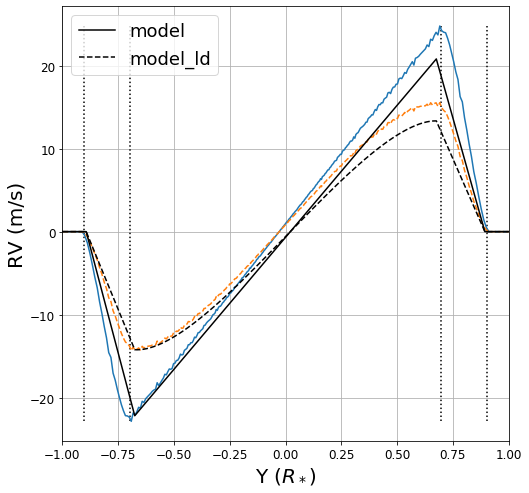

In [30]:
arg_in = np.argwhere((tau**2 + b**2) < (1 - gamma)**2)
arg_out = np.argwhere((tau**2 + b**2) > (1 + gamma)**2)

RV_test = np.ones(len(tau))
RV_test[arg_out] = 0
RV_test[arg_in] = -VSsiniS * gamma**2 / (1 - gamma**2) * (
    tau[arg_in] * np.cos(lamb) - b * np.sin(lamb))
RV_test_ld = RV_test.copy()
RV_test_ld[arg_in] *= (1 - epsilon * (1 -
                                      (1 - tau[arg_in]**2 - b**2)**(1 / 2)))

arg = np.append(arg_in, arg_out)
arg.sort()
f, ax_RM_test = plt.subplots(figsize=(8, 8))
v = vrot
plot_RM_rv(x_circ, y_circ, v, ax_RM_test)
ax_RM_test.plot(tau[arg],
                RV_test[arg],
                label='model',
                color='k')
ax_RM_test.plot(tau[arg],
                RV_test_ld[arg],
                label='model_ld',
                color='k',
                linestyle='--')
ax_RM_test.set_xlim(-1, 1)
ax_RM_test.legend(fontsize=18)
ax_RM_test.set_xlabel('Y ($R_*$)', fontsize=20)

## 估计行星公转轴和恒星自转轴的真实张角

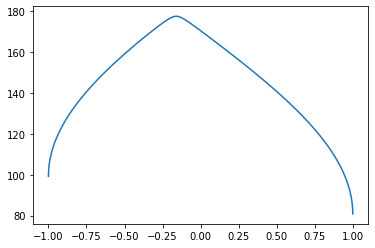

In [21]:
cosis = np.linspace(-1, 1, 10000)
lamb = 182.5 * deg
psi = np.arccos(cosis * np.cos(i_p) + np.sin(np.arccos(cosis)) * np.sin(i_p) *
                np.cos(lamb)) * 180 / np.pi
plt.plot(cosis, psi)

In [32]:
arg_psi = np.argwhere(psi < 90 * deg)
print(1-len(arg_psi)/10000)

0.9935
